# Segmenting and Clustering Neighborhoods in the city of Toronto, Canada 

# Part 1

The following **pandas.read_html** command required the **lxml** package. Uncomment the following line, if it is not installed in your system. Restart the kernel after installation. 

In [1]:
#%pip install lxml  # if you work within an environment or...
#!pip install lxml  # else

Loading necessary libraries...

In [46]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

Use pandas to create a list of tables from the wikipedia page listing all postal codes of Canada. As **pandas.read_html** returns a list of all tables found, we only take the first (and only) table.

In [3]:
postalcodes_raw = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
postalcodes_raw

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
...,...,...,...
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN
178,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...


Let's have a look how many postal codes each borough of canada has.

In [4]:
postalcodes_raw.groupby('Borough').count()

,Postal code,Neighborhood
Borough,,
Central Toronto,9,9
Downtown Toronto,19,19
East Toronto,5,5
East York,5,5
Etobicoke,12,12
Mississauga,1,1
North York,24,24
Not assigned,77,0
Scarborough,17,17


As there are 77 postal codes **Not assigned** to any borough, we delete these lines and obtain...

In [5]:
postalcodes = postalcodes_raw[postalcodes_raw['Borough']!='Not assigned'].reset_index(drop=True)
postalcodes

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing Centre
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...


Are there any **Not assigned** or **NaN** neighborhoods?

In [6]:
print('Not assigned neighborhoods: ',sum(postalcodes['Neighborhood']=='Not assigned'))
print('NaN neighborhoods: ', postalcodes['Neighborhood'].isna().sum())

Not assigned neighborhoods:  0
NaN neighborhoods:  0


Apparently not. So we can continue with our clean data frame and replace ' / ' with a comma.

In [7]:
postalcodes.replace(" /", ",", regex=True, inplace=True)
postalcodes

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing Centre
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Notice that all postal codes are unique in this data frame.

In [8]:
postalcodes['Postal code'].nunique() == len(postalcodes)

True

Let's print out the shape of this data frame.

In [9]:
postalcodes.shape

(103, 3)

# Part 2

We try to get the locations of our postal code areas. As libraries like **geocoder** or **geopy** didn't work, we'll use a csv-file downloaded from the internet.

In [10]:
locations = pd.read_csv('https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv')
locations

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


Let's merge the postcodes data frame with the locations data frame on their postal code columns. The resulting data frame has two identical columns **Postal code** from **postcodes** and **Post Code** from **locations** and we drop the second. Afterwards we sort the postal codes.

In [11]:
postalcode_locations = postalcodes.merge(locations, left_on = 'Postal code', right_on = 'Postal Code').sort_values('Postal code').drop('Postal Code', axis=1).reset_index(drop=True)
postalcode_locations

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


# Part 3

We create a boolean mask to filter out all rows containing **Toronto** in the borough name. Afterwards we apply the mask to our **postalcode_locations** data frame and set **Post code** as our new index.

In [12]:
mask = postalcode_locations['Borough'].map(lambda x: 'Toronto' in x)
toronto_postalcode_locations = postalcode_locations[mask].set_index('Postal code')
toronto_postalcode_locations

,Borough,Neighborhood,Latitude,Longitude
Postal code,,,,
M4E,East Toronto,The Beaches,43.676357,-79.293031
M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
M4M,East Toronto,Studio District,43.659526,-79.340923
M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
M4P,Central Toronto,Davisville North,43.712751,-79.390197
M4R,Central Toronto,North Toronto West,43.715383,-79.405678
M4S,Central Toronto,Davisville,43.704324,-79.388790
M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


In [13]:
#@hidden_cell
CLIENT_ID = '<hidden>' # your Foursquare ID
CLIENT_SECRET = '<hidden>' # your Foursquare Secret
VERSION = '20180605'

We send a request to **foursquare** to get a list of up to 100 venues in a radius of 1000 meters around a postal code center.

In [14]:
import requests

radius = 1000
LIMIT = 100
venues_list=[]

for postalcode in toronto_postalcode_locations.index:
    latitude, longitude = toronto_postalcode_locations.loc[postalcode,['Latitude', 'Longitude']].values
                    
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
    venues_list.append([(
            postalcode, 
            latitude, 
            longitude, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    toronto_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    toronto_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
toronto_venues

,Postal Code,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,M4E,43.676357,-79.293031,Tori's Bakeshop,43.672114,-79.290331,Vegetarian / Vegan Restaurant
2,M4E,43.676357,-79.293031,Beaches Bake Shop,43.680363,-79.289692,Bakery
3,M4E,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
4,M4E,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
...,...,...,...,...,...,...,...
3175,M7Y,43.662744,-79.321558,Sweet Bliss Baking Company,43.663782,-79.328110,Bakery
3176,M7Y,43.662744,-79.321558,Tim Hortons,43.662644,-79.309945,Coffee Shop
3177,M7Y,43.662744,-79.321558,Breakfast Club,43.662811,-79.310174,Breakfast Spot
3178,M7Y,43.662744,-79.321558,Carters Landing,43.662414,-79.309898,Bistro


Let us list the top 20 venue catgories with their amount of venues.

In [15]:
toronto_venues.groupby('Venue Category')[['Postal Code']].count(
    ).rename(columns={'Postal Code':'Venues per Category'}).sort_values('Venues per Category', ascending=False).head(20) 

,Venues per Category
Venue Category,
Coffee Shop,257
Café,190
Restaurant,92
Park,90
Italian Restaurant,81
Bakery,69
Japanese Restaurant,67
Sushi Restaurant,64
Pizza Place,63


Given a postal code, we can compute how often each venue category occurs in the postal code area. Dividing it by the number of all venues in that area, we get a relative occurrence for each venue category. For example, a value of 0.02 means that 2% of all venues in a postal code area were in this particular category.
The following  data frame contains these relative occurrences. Note that the sum of all values along a row is 1.0, i.e. 100%.

In [16]:
toronto_venues_category_one_hot = pd.get_dummies(toronto_venues['Venue Category'])
toronto_venues_category_one_hot['Postal Code'] = toronto_venues['Postal Code']
toronto_grouped = toronto_venues_category_one_hot.groupby('Postal Code').mean()
toronto_grouped.sort_values('M4E', axis=1, ascending=False).head(5)

,Pub,Coffee Shop,Pizza Place,Breakfast Spot,Japanese Restaurant,Beach,Burger Joint,Bakery,Tea Room,Park,...,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Zoo
Postal Code,,,,,,,,,,,,,,,,,,,,,
M4E,0.076923,0.064103,0.051282,0.038462,0.038462,0.038462,0.025641,0.025641,0.025641,0.025641,...,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M4K,0.050000,0.070000,0.020000,0.010000,0.010000,0.000000,0.010000,0.020000,0.000000,0.010000,...,0.010000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M4L,0.012821,0.051282,0.012821,0.012821,0.012821,0.038462,0.012821,0.025641,0.000000,0.025641,...,0.012821,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M4M,0.000000,0.070000,0.010000,0.010000,0.000000,0.000000,0.000000,0.040000,0.000000,0.020000,...,0.000000,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M4N,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We compute the most common venue in each postal code area.

In [17]:
num_top_venues = 10

# create columns according to number of top venues
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postalcodes_venues_sorted = pd.DataFrame(index = toronto_grouped.index, columns=columns)
postalcodes_venues_sorted['Neighborhood'] = toronto_postalcode_locations['Neighborhood']
for code in toronto_grouped.index:
    postalcodes_venues_sorted.loc[code, columns[1:]] = toronto_grouped.loc[code,:].sort_values(ascending=False).index[: num_top_venues]

postalcodes_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postal Code,,,,,,,,,,,
M4E,The Beaches,Pub,Coffee Shop,Pizza Place,Breakfast Spot,Japanese Restaurant,Beach,Burger Joint,Bar,Tea Room,Bakery
M4K,"The Danforth West, Riverdale",Greek Restaurant,Coffee Shop,Café,Pub,Bank,Italian Restaurant,Fast Food Restaurant,Ice Cream Shop,Discount Store,Frozen Yogurt Shop
M4L,"India Bazaar, The Beaches West",Indian Restaurant,Coffee Shop,Beach,Fast Food Restaurant,Café,Burrito Place,Restaurant,Grocery Store,Gym,Bakery
M4M,Studio District,Coffee Shop,Bar,Brewery,Café,Vietnamese Restaurant,Bakery,American Restaurant,Diner,Italian Restaurant,French Restaurant
M4N,Lawrence Park,Restaurant,Trail,Bookstore,College Quad,Gym / Fitness Center,Park,College Gym,Coffee Shop,Café,Donut Shop
M4P,Davisville North,Coffee Shop,Italian Restaurant,Café,Restaurant,Dessert Shop,Fast Food Restaurant,Pizza Place,Sushi Restaurant,Pharmacy,Gym
M4R,North Toronto West,Italian Restaurant,Coffee Shop,Sporting Goods Shop,Park,Skating Rink,Restaurant,Diner,Mexican Restaurant,Café,Electronics Store
M4S,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Café,Pizza Place,Restaurant,Indian Restaurant,Gym,Gastropub,Dessert Shop
M4T,"Moore Park, Summerhill East",Coffee Shop,Italian Restaurant,Grocery Store,Park,Thai Restaurant,Sushi Restaurant,Gym,Bagel Shop,Bank,Café


We apply the K-means algorithm to cluster our postal codes in **num_cluster** clusters. Trying various values for **num_cluster** = 5 is a good choice with 2 clusters representing *outliers*. 

In [18]:
num_clusters = 5
num_init = 150   # number of run times of KMeans with different initializations
cluster_labels = KMeans(n_clusters = num_clusters, n_init = num_init).fit(toronto_grouped).labels_

## Examine Clusters

Before we list all postal code areas in a given cluster, let us plot all postal code areas on a map using the same color for areas in the same cluster. The following plot requires **folium**. If you don't have it, uncomment one line in the following code cell, run it, and restart the kernel.  

In [19]:
#%pip install folium  # if you work within an environment or...
#!pip install folium  # else

In [34]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, num_clusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]    

# a function plotting our clusters of Toronto postal code areas 
def plot_map(cluster_labels):
    


    latitude = 43.67
    longitude = -79.4
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

    # set color scheme for the clusters

    # add markers to the map
    markers_colors = []
    for _, postalcode in enumerate(toronto_postalcode_locations.index):
        latitude, longitude = toronto_postalcode_locations.loc[postalcode,['Latitude', 'Longitude']].values
        cluster = cluster_labels[_]
        label = folium.Popup(str(postalcode) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [latitude, longitude],
            radius=5,
            popup=label,
            color=rainbow[cluster],
            fill=True,
            fill_color=rainbow[cluster],
            fill_opacity=0.7).add_to(map_clusters)
       
    return map_clusters
    
plot_map(cluster_labels)

For each cluster we list all postal code areas in that cluster along with their 10 most common venues.

In [35]:
cluster_venues_sorted = postalcodes_venues_sorted.groupby(cluster_labels)

## Cluster 1

In [36]:
cluster_venues_sorted.get_group(0)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postal Code,,,,,,,,,,,
M4E,The Beaches,Pub,Coffee Shop,Pizza Place,Breakfast Spot,Japanese Restaurant,Beach,Burger Joint,Bar,Tea Room,Bakery
M4K,"The Danforth West, Riverdale",Greek Restaurant,Coffee Shop,Café,Pub,Bank,Italian Restaurant,Fast Food Restaurant,Ice Cream Shop,Discount Store,Frozen Yogurt Shop
M4L,"India Bazaar, The Beaches West",Indian Restaurant,Coffee Shop,Beach,Fast Food Restaurant,Café,Burrito Place,Restaurant,Grocery Store,Gym,Bakery
M4M,Studio District,Coffee Shop,Bar,Brewery,Café,Vietnamese Restaurant,Bakery,American Restaurant,Diner,Italian Restaurant,French Restaurant
M4P,Davisville North,Coffee Shop,Italian Restaurant,Café,Restaurant,Dessert Shop,Fast Food Restaurant,Pizza Place,Sushi Restaurant,Pharmacy,Gym
M4R,North Toronto West,Italian Restaurant,Coffee Shop,Sporting Goods Shop,Park,Skating Rink,Restaurant,Diner,Mexican Restaurant,Café,Electronics Store
M4S,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Café,Pizza Place,Restaurant,Indian Restaurant,Gym,Gastropub,Dessert Shop
M4X,"St. James Town, Cabbagetown",Park,Gastropub,Café,Diner,Restaurant,Japanese Restaurant,Italian Restaurant,Theater,Thai Restaurant,Deli / Bodega
M4Y,Church and Wellesley,Coffee Shop,Sushi Restaurant,Park,Japanese Restaurant,Diner,Gastropub,Café,Bookstore,Dance Studio,Italian Restaurant


## Cluster 2

In [37]:
cluster_venues_sorted.get_group(1)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postal Code,,,,,,,,,,,
M5B,"Garden District, Ryerson",Coffee Shop,Gastropub,Café,Japanese Restaurant,Restaurant,Hotel,Diner,Theater,Cosmetics Shop,Italian Restaurant
M5C,St. James Town,Coffee Shop,Café,Restaurant,Seafood Restaurant,Gastropub,Hotel,Theater,Italian Restaurant,Bookstore,Tea Room
M5E,Berczy Park,Coffee Shop,Café,Hotel,Japanese Restaurant,Restaurant,Park,Bakery,Grocery Store,Gym,Liquor Store
M5H,"Richmond, Adelaide, King",Café,Coffee Shop,Hotel,Theater,Tea Room,Japanese Restaurant,Restaurant,American Restaurant,Bookstore,Furniture / Home Store
M5J,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Café,Hotel,Japanese Restaurant,Park,Brewery,Gym,Theater,Pizza Place,Restaurant
M5K,"Toronto Dominion Centre, Design Exchange",Coffee Shop,Hotel,Café,Japanese Restaurant,Theater,Restaurant,Seafood Restaurant,Concert Hall,Thai Restaurant,Gym
M5L,"Commerce Court, Victoria Hotel",Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,Seafood Restaurant,Concert Hall,Deli / Bodega,Thai Restaurant,Theater
M5W,Stn A PO Boxes,Coffee Shop,Café,Hotel,Japanese Restaurant,Seafood Restaurant,Restaurant,Park,Gastropub,Cocktail Bar,Beer Bar
M5X,"First Canadian Place, Underground city",Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,Seafood Restaurant,Concert Hall,Theater,Gym,Park


## Cluster 3

In [38]:
cluster_venues_sorted.get_group(2)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postal Code,,,,,,,,,,,
M4N,Lawrence Park,Restaurant,Trail,Bookstore,College Quad,Gym / Fitness Center,Park,College Gym,Coffee Shop,Café,Donut Shop


## Cluster 4

In [39]:
cluster_venues_sorted.get_group(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postal Code,,,,,,,,,,,
M4T,"Moore Park, Summerhill East",Coffee Shop,Italian Restaurant,Grocery Store,Park,Thai Restaurant,Sushi Restaurant,Gym,Bagel Shop,Bank,Café
M4V,"Summerhill West, Rathnelly, South Hill, Forest...",Coffee Shop,Park,Sushi Restaurant,Thai Restaurant,Italian Restaurant,Grocery Store,Café,Pizza Place,Pub,Bagel Shop
M4W,Rosedale,Coffee Shop,Grocery Store,Park,Filipino Restaurant,Candy Store,Bistro,Japanese Restaurant,Bank,BBQ Joint,Breakfast Spot
M5N,Roselawn,Sushi Restaurant,Coffee Shop,Italian Restaurant,Pharmacy,Café,Bank,Dance Studio,Japanese Restaurant,Skating Rink,Gym
M5P,Forest Hill North & West,Café,Bank,Park,Coffee Shop,Italian Restaurant,Liquor Store,Sushi Restaurant,Burger Joint,Trail,Asian Restaurant


## Cluster 5

In [40]:
cluster_venues_sorted.get_group(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Postal Code,,,,,,,,,,,
M5V,"CN Tower, King and Spadina, Railway Lands, Har...",Coffee Shop,Harbor / Marina,Café,Dance Studio,Garden,Sculpture Garden,Track,Sushi Restaurant,Park,Scenic Lookout


Note that we embedded 39 Toronto postal code areas into a 270 dimensional simplex given by the equations
$$ t_i \ge 0\; \forall i = 1, \ldots, 271 \qquad\mbox{and}\qquad \sum_{i=1}^{271} t_i = 1 $$
where 271 is the number of venue categories. To get a better insight, we use the PCA algorithm to reduce the dimensions to 2 and 3. 

In [41]:
from sklearn.decomposition import PCA

toronto_2d = PCA(n_components=2).fit_transform(toronto_grouped)
toronto_3d = PCA(n_components=3).fit_transform(toronto_grouped)

For each low dimensional embedding we compute a clustering. The colors are used for plotting.

In [42]:
labels_2d = KMeans(n_clusters=num_clusters, n_init=num_init).fit(toronto_2d).labels_
colors_2d = [rainbow[cluster] for cluster in labels_2d]

labels_3d = KMeans(n_clusters=num_clusters, n_init=num_init).fit(toronto_3d).labels_
colors_3d = [rainbow[cluster] for cluster in labels_3d]

We plot our clusters in the 2 and 3 dimensional spaces respectively.

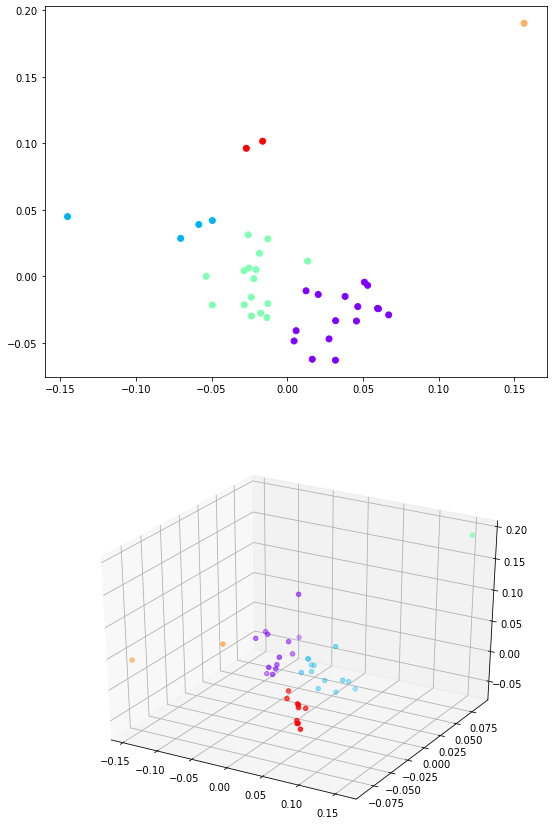

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, projection='3d')
u, v = toronto_2d[:,0], toronto_2d[:,1]
x,y,z = toronto_3d[:,0], toronto_3d[:,1], toronto_3d[:,2]
ax1.scatter(u,v, c=colors_2d)
ax2.scatter(x, z, y, c=colors_3d)
plt.show()

In [44]:
plot_map(labels_2d) # the map of Toronto showing the clusters from the 2 dimensional embedding

In [45]:
plot_map(labels_3d) # the map of Toronto showing the clusters from the 3 dimensional embedding